I want to know how accurate the vangard index fund (vusa) is tracking s&p500 index.
Vusa.L means it is the one on the London Stock exchange

In [2]:
# to install yfinance:
#!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
snp500=yf.Ticker('^GSPC')

In [4]:
vusa=yf.Ticker('VUSA.L')

In [5]:
hist_snp=snp500.history(period='max')
hist_vusa=vusa.history(period='max')

In [6]:
hist_snp.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0
1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0
1950-01-05,16.93,16.93,16.93,16.93,2550000,0,0
1950-01-06,16.98,16.98,16.98,16.98,2010000,0,0
1950-01-09,17.08,17.08,17.08,17.08,2520000,0,0


In [7]:
hist_vusa.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-11-30,65.702499,66.150002,65.230003,65.812500,485063,0,0
2021-12-01,65.717499,66.342499,65.599998,66.257500,370154,0,0
2021-12-02,64.894997,65.254997,64.297501,64.974998,424792,0,0
2021-12-03,65.577499,66.309998,64.879997,65.167503,330524,0,0
2021-12-07,66.162498,67.415001,66.135002,67.322502,372077,0,0


In [8]:
hist_snp.reset_index(inplace=True)
date=hist_snp['Date']
open_snp=hist_snp['Open']
hist_vusa.reset_index(inplace=True)
date_v=hist_vusa['Date']
open_v=hist_vusa['Open']

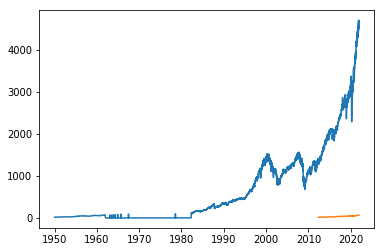

In [9]:
plt.plot(date,open_snp)
plt.plot(date_v,open_v)

Problems:

1)Vusa exists from 2012 and s&p is much older index

2)The scale.

In [12]:
df1 = hist_snp.iloc[:, 0:2]
df1

,Date,Open
0,1950-01-03,16.660000
1,1950-01-04,16.850000
2,1950-01-05,16.930000
3,1950-01-06,16.980000
4,1950-01-09,17.080000
...,...,...
18096,2021-12-01,4602.819824
18097,2021-12-02,4504.729980
18098,2021-12-03,4589.490234
18099,2021-12-06,4548.370117


In [13]:
df = pd.DataFrame(df1)
start_date = '2012-05-22'
end_date = '2021-12-06'
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
  
df = df.loc[mask]
display(df)


,Date,Open
15699,2012-05-23,1316.020020
15700,2012-05-24,1318.719971
15701,2012-05-25,1320.810059
15702,2012-05-29,1318.900024
15703,2012-05-30,1331.250000
...,...,...
18095,2021-11-30,4640.250000
18096,2021-12-01,4602.819824
18097,2021-12-02,4504.729980
18098,2021-12-03,4589.490234


In [14]:
df2=hist_vusa.iloc[:, 0:2]
df3 = pd.DataFrame(df2)
start_date = '2012-05-22'
end_date = '2021-12-06'
mask = (df3['Date'] > start_date) & (df3['Date'] <= end_date)
  
df3 = df3.loc[mask]
display(df3)

,Date,Open
1,2012-05-23,15.770000
2,2012-05-24,15.960000
3,2012-05-25,16.110001
4,2012-05-29,16.120001
5,2012-05-30,16.100000
...,...,...
2408,2021-11-29,66.070000
2409,2021-11-30,65.702499
2410,2021-12-01,65.717499
2411,2021-12-02,64.894997


Why VUSA dataset is bigger? 

In [15]:
#hist_snp.reset_index(inplace=True)
date=df['Date']
open_snp=df['Open']
#hist_vusa.reset_index(inplace=True)
date_v=df3['Date']
open_v=df3['Open']

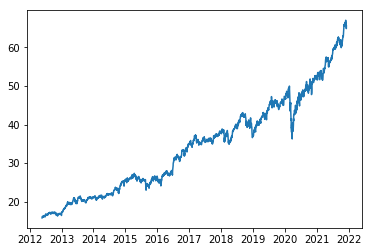

In [16]:
plt.plot(date_v,open_v)

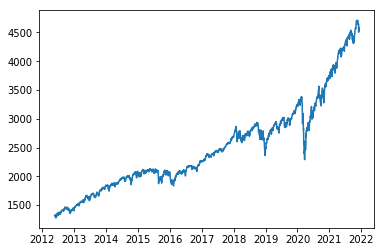

In [17]:
plt.plot(date,open_snp)

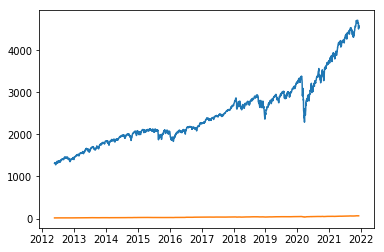

In [18]:
plt.plot(date,open_snp)
plt.plot(date_v,open_v)
plt.show()

Need to use better names df, df1,df2,df3 is too confusing.